In [1]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/apple/Desktop/bank-case/data-cleaned.csv')

In [3]:
df.dropna(subset = ['Jan_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Feb_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Mar_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Apr_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['May_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Jun_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['July_Payment_Status'], axis = 0, inplace = True)

In [4]:
X = df[['Jan_Repay_Status','Feb_Repay_Status','Mar_Repay_Status','Apr_Repay_Status','May_Repay_Status','Jun_Repay_Status']]
y = df['July_Payment_Status']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24372, 6) (24372,)
Test set: (6094, 6) (6094,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [7]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.8070233 , 0.80915655, 0.80817197, 0.81703315, 0.81128979,
       0.81440761, 0.81128979, 0.81654086, 0.82047916])

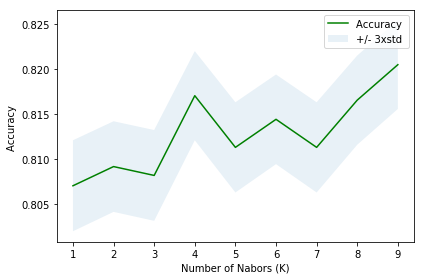

In [8]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [9]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8204791598293404 with k= 9


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 508  830]
 [ 264 4492]]


In [13]:
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat=neigh.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 508  830]
 [ 264 4492]]


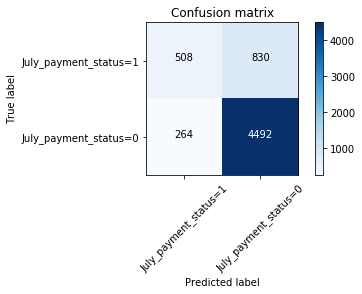

In [15]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['July_payment_status=1','July_payment_status=0'],normalize= False,  title='Confusion matrix')